Importing all the necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as  np
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

## 1. Load Data

Raw dataset is loaded in this section

In [2]:
#Loading the data and storing into a dataframe
df = pd.read_csv('dataset/dataset.csv')

In [3]:
#Sample and total features
df.shape

(34857, 21)

In [4]:
#first five rows of the dataset
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
#all the columns in the dataset
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
#siplay samples, datatype of each features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
#total nan values in each features
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [8]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


## 2. Exploratory Data Analysis

This step is necessary so understand the data

In [9]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [10]:
# df['c-area'].unique()


Lets rename the columns name for ease use.

In [11]:

df = df.rename(columns ={'Suburb' : 'sub',
                    'Address' : 'add',
                    'Rooms' : 'rooms',
                    'Type' : 'type',
                    'Price' : 'price',
                    'Method' : 'sell-meth',
                    'SellerG' : 'seller',
                    'Date' : 'date',
                    'Distance' : 'dist',
                    'PostCode' : 'post-code',
                    'Bedroom2' : 'bed2',
                    'Bathroom' : 'bathroom',
                    'Car' : 'car',
                    'Landsize' : 'l-size',
                    'BuildingArea' : 'b-area',
                    'YearBuilt' : 'build-year',
                    'CouncilArea' : 'c-area',
                    'Lattitude' : 'lati',
                    'Longtitude' : 'long',
                    'Regionname' : 'reg-name',
                    'Propertycount' : 'prop-count'
} )

Drop columns which are unwanted

In [12]:
# df.drop(columns= ['date'], inplace= True)


### 2.1 Mapping Feature samples for better understanding

There are lot samples with in understandable values, so lets map them with appropriate name first

In [13]:
# # Define mapping dictionaries for both columnsasdaf

# selling_method_mapping = {
#     'SS': 'Sold Before Auction',
#     'S': 'Sold',
#     'VB': 'Vendor Bid',
#     'SP': 'Sold Prior',
#     'PI': 'Passed In',
#     'SN': 'Sold Not Disclosed',
#     'W': 'Withdrawn',
#     'PN': 'Passed In, Vendor Bid',
#     'SA': 'Sold After Auction'
# }
# # Use the map function to replace values in both columns
# df['sell-meth'] = df['sell-meth'].map(selling_method_mapping)
# # Define mapping dictionaries for both columnsasdaf
# type_mapping = {'h': 'house', 'u': 'unit', 't': 'town'}
# df['type'] = df['type'].map(type_mapping)

# # Display the updated DataFrame
# df.head()


### 2.1 Univariate Analysis

This section covers all the data analysis for single variable exploratory data analysis

##### 2.1.0 Histogram

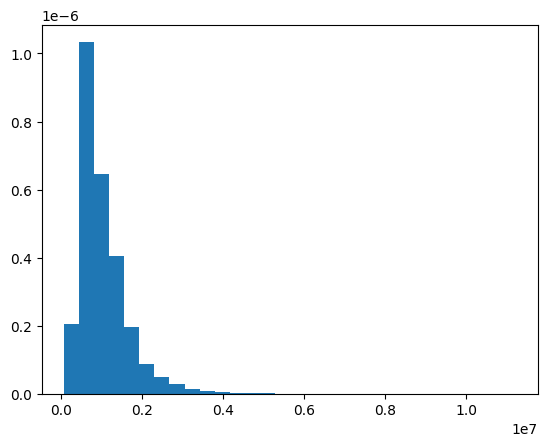

In [14]:
import matplotlib.pyplot as plt

# Plot a histogram of your data
plt.hist(data = df, x = 'price', bins=30, density=True)
plt.show()


##### 2.1.1 Count Plot

<Axes: xlabel='sell-meth', ylabel='count'>

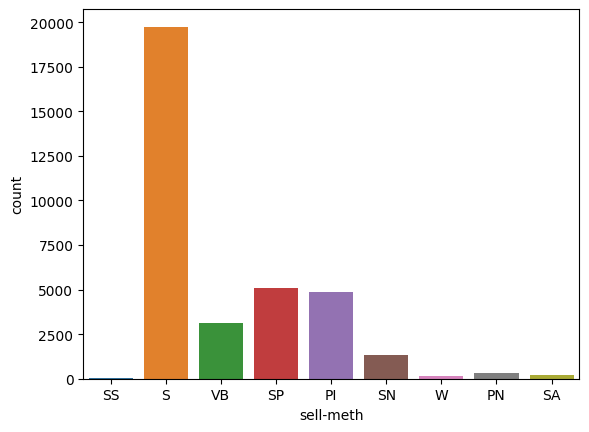

In [15]:
#lets check all the selling method for each house
sns.countplot(data = df, x = 'sell-meth', hue = df['sell-meth'])

<Axes: xlabel='rooms', ylabel='count'>

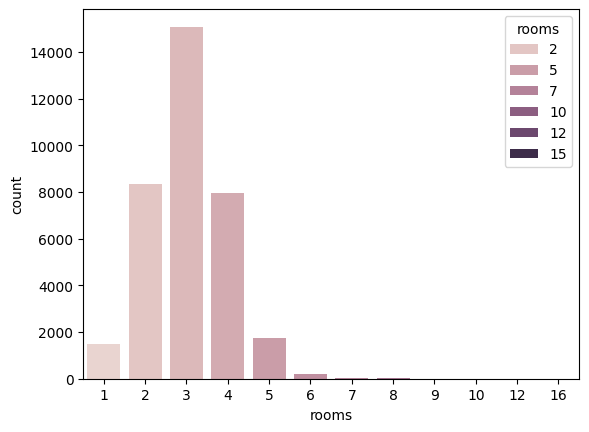

In [16]:
#lets check the number of rooms in each house
sns.countplot(data = df, x = 'rooms', hue = 'rooms')

<Axes: xlabel='type', ylabel='count'>

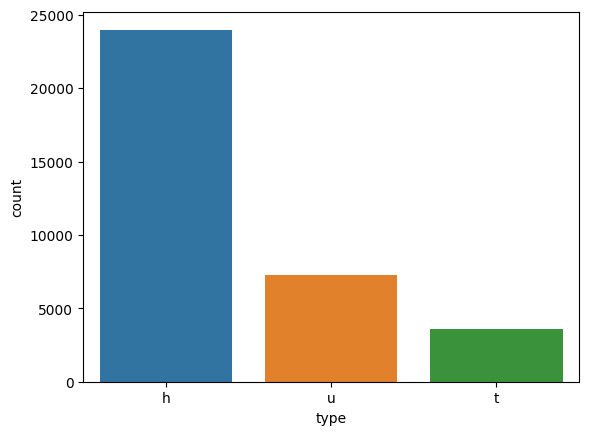

In [17]:
#lets check the number of rooms in each house
sns.countplot(data = df, x = 'type', hue = 'type')


##### 2.1.2 Distribution Plot

The price is logged.


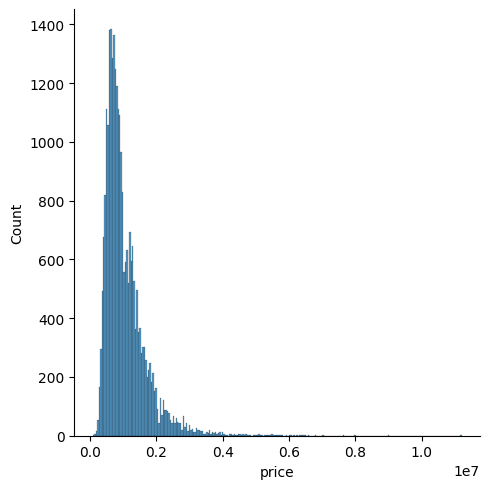

In [18]:
sns.displot(data = df, x = 'price')
print('The price is logged.')

### 2.2 Multivariate Analysis

##### 2.2.1 Box Plot

<Axes: xlabel='type', ylabel='price'>

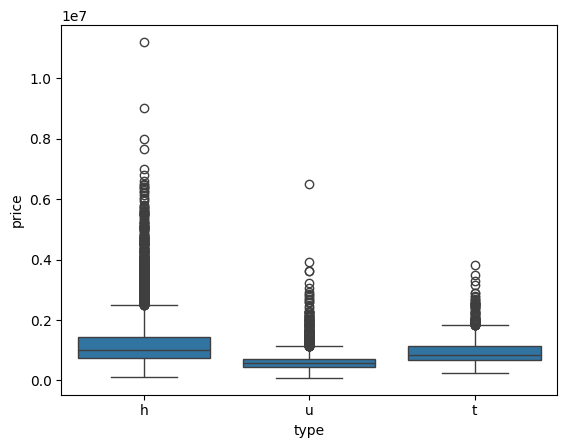

In [19]:
# sns.boxplot(data = df, x= 'type', y = 'price')
sns.boxplot(x = df["type"], y = df['price'])

##### 2.2.2 Scatter Plot

<Axes: xlabel='rooms', ylabel='price'>

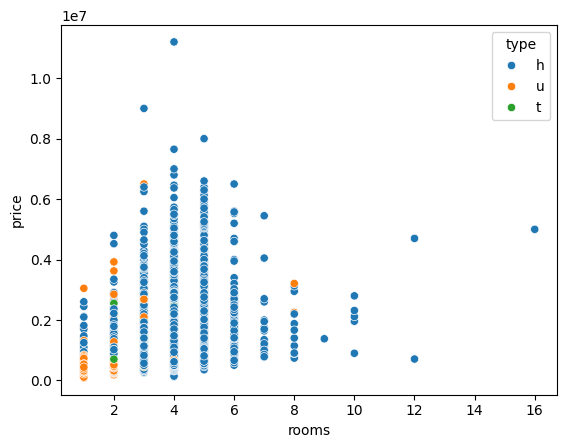

In [20]:
sns.scatterplot(data = df, x ='rooms', y = 'price', hue = 'type') 

<Axes: xlabel='type', ylabel='price'>

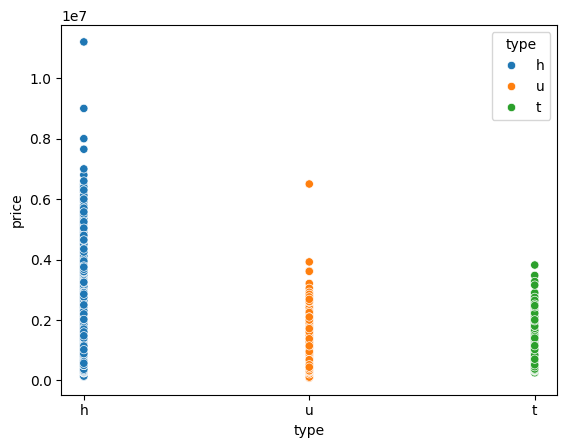

In [21]:
sns.scatterplot(data = df, x ='type', y = 'price', hue = 'type') 

<Axes: xlabel='dist', ylabel='price'>

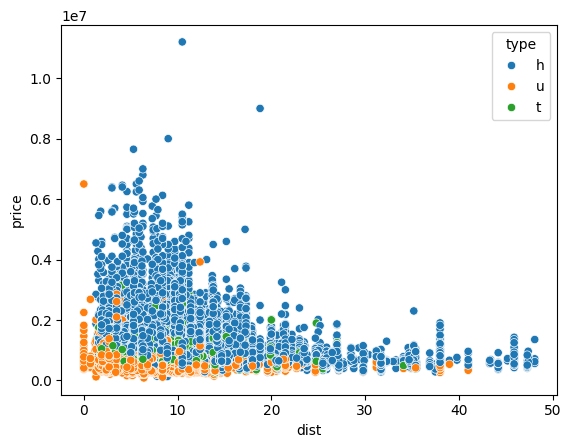

In [22]:
sns.scatterplot(data = df, x ='dist', y = 'price', hue = 'type') 

##### 2.2.3 Encoding

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sub         34857 non-null  object 
 1   add         34857 non-null  object 
 2   rooms       34857 non-null  int64  
 3   type        34857 non-null  object 
 4   price       27247 non-null  float64
 5   sell-meth   34857 non-null  object 
 6   seller      34857 non-null  object 
 7   date        34857 non-null  object 
 8   dist        34856 non-null  float64
 9   Postcode    34856 non-null  float64
 10  bed2        26640 non-null  float64
 11  bathroom    26631 non-null  float64
 12  car         26129 non-null  float64
 13  l-size      23047 non-null  float64
 14  b-area      13742 non-null  float64
 15  build-year  15551 non-null  float64
 16  c-area      34854 non-null  object 
 17  lati        26881 non-null  float64
 18  long        26881 non-null  float64
 19  reg-name    34854 non-nul

In [24]:
# le = LabelEncoder()
# #loading all the categorical features in this
# categorical_column = ['sub', 'add','type', 'reg-name', 'sell-meth', 'seller']
# for categories in categorical_column:
#     df[categories] = le.fit_transform(df[categories])
#     le.transform(le.classes_)

##### 2.2.4 Correlation Matrix

In [25]:
df.head()

,sub,add,rooms,type,price,sell-meth,seller,date,dist,Postcode,...,bathroom,car,l-size,b-area,build-year,c-area,lati,long,reg-name,prop-count
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [26]:
le = LabelEncoder()
#loading all the categorical features in this
categorical_column = ['sub', 'add','type', 'reg-name', 'sell-meth', 'seller']
for categories in categorical_column:
    df[categories] = le.fit_transform(df[categories])
    le.transform(le.classes_)

In [27]:
df.columns


Index(['sub', 'add', 'rooms', 'type', 'price', 'sell-meth', 'seller', 'date',
       'dist', 'Postcode', 'bed2', 'bathroom', 'car', 'l-size', 'b-area',
       'build-year', 'c-area', 'lati', 'long', 'reg-name', 'prop-count'],
      dtype='object')

/tmp/ipykernel_6053/3245070767.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


<Axes: >

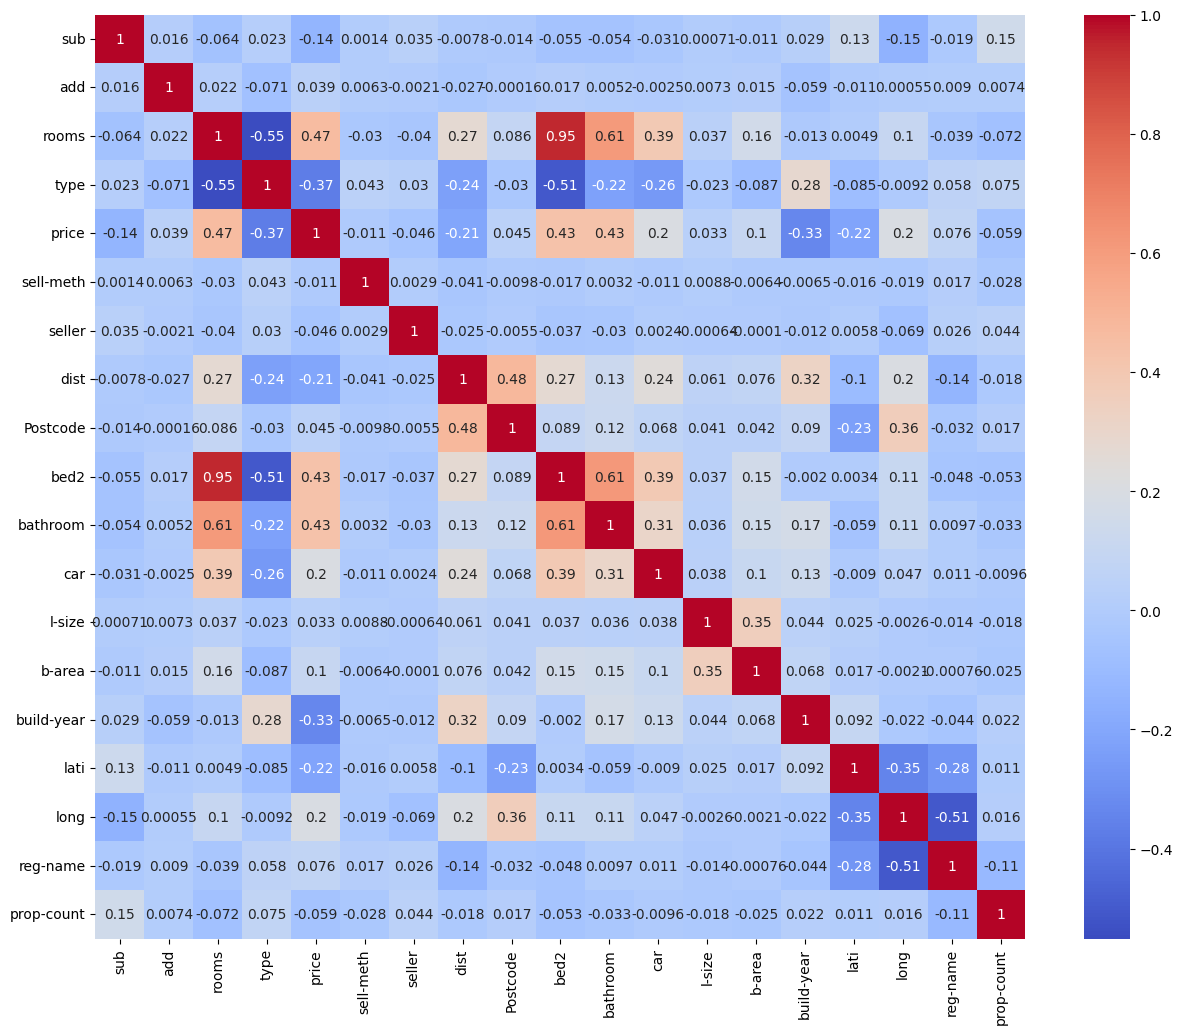

In [28]:
plt.figure(figsize = (15,12))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [29]:
from scipy import stats

column_to_test = df['price']

# Apply the Shapiro-Wilk test
stat, p = stats.shapiro(column_to_test)

if p > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")


The data appears to be normally distributed.


/usr/local/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [30]:
# from scipy.stats import kurtosis, skew

# kurt = kurtosis(df['price'])
# skewness = skew(df['price'])

# if kurt == 3 and skewness == 0:
#     print("The data is normally distributed.")
# else:
#     print("The data may not be normally distributed.")
# ??????????????


The data may not be normally distributed.


## 3. Feature Engineering

##### 3.1 Feature Selection

From the correlation matrix seen in 2., we can identify some important features impacting the final price of house. 

In [31]:
df['price'] = np.log(df['price'])
df['price'].head()

0          NaN
1    14.207553
2    13.849912
3          NaN
4    14.197366
Name: price, dtype: float64

In [32]:
df.dropna(subset=['price'], inplace=True)


In [33]:
X = df[['rooms', 'type', 'bed2', 'bathroom', 'car', 'long']]
y = df[['price']]


##### 3.2 Train Test Split

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a DataFrame for your testing set
test_data = pd.DataFrame({
    'rooms': X_test['rooms'].values.tolist(),
    'type': X_test['type'].values.tolist(),
    'bed2': X_test['bed2'].values.tolist(),
    'bathroom': X_test['bathroom'].values.tolist(),
    'car': X_test['car'].values.tolist(),
    'long': X_test['long'].values.tolist(),
    'price': y_test.values.tolist()
})

# Save the testing set to a new CSV file
test_data.to_csv('dataset/testing_data.csv', index=False)


# 4. Preprocessing

##### 4.1 Null Values

In [ ]:
#total nan values in Price
null_price = df['price'].isnull().sum()
print ('Total number of null values in Price is',null_price,".", "So, this requires some data preprocessing.")

In [ ]:
# df.dropna(subset=['price'], inplace=True)


In [ ]:
roomsnull = X_train['rooms'].isnull().sum()
bedroomnull= X_train['bed2'].isnull().sum()
bathroomnull = X_train['bathroom'].isnull().sum()
typenull = X_train['type'].isnull().sum()
longnull = X_train['long'].isnull().sum()
carnull = X_train['car'].isnull().sum()
print ('No. of nulls in is room is : ', roomsnull)
# print ('No. of nulls in is price is : ', pricenull)
print ('No. of nulls in is bedroom is : ', bedroomnull)
print ('No. of nulls in is bathroom is : ',bathroomnull )
print ('No. of nulls in is type is : ',typenull)
print ('No. of nulls in is longitude is : ',longnull )
print ('No. of nulls in is car is : ',carnull )


So, we can see a lot of nulls in the dataset. This requires some data processing. 
Lets check the target for this project. 

In [ ]:
X_train['bed2'].fillna(X_train['bed2'].mode()[0], inplace=True)
X_train['bathroom'].fillna(X_train['bathroom'].mode()[0], inplace=True)
X_train['long'].fillna(X_train['long'].mode()[0], inplace=True)
X_train['car'].fillna(X_train['car'].mode()[0], inplace=True)


In [ ]:
roomsnull = X_train['rooms'].isnull().sum()
bedroomnull= X_train['bed2'].isnull().sum()
bathroomnull = X_train['bathroom'].isnull().sum()
typenull = X_train['type'].isnull().sum()
longnull = X_train['long'].isnull().sum()
carnull = X_train['car'].isnull().sum()
print ('No. of nulls in is room is : ', roomsnull)
# print ('No. of nulls in is price is : ', pricenull)
print ('No. of nulls in is bedroom is : ', bedroomnull)
print ('No. of nulls in is bathroom is : ',bathroomnull )
print ('No. of nulls in is type is : ',typenull)
print ('No. of nulls in is longitude is : ',longnull )
print ('No. of nulls in is car is : ',carnull )


In [ ]:
if 'price' in y_train.columns and 'price' in y_test.columns:
    # Dropping missing values in the 'price' column
    y_train['price'].dropna(inplace=True)
    y_test['price'].dropna(inplace=True)
else:
    print("The 'price' column does not exist in either y_train or y_test data frames.")


In [ ]:
# from sklearn.impute import SimpleImputer

# # Initialize a SimpleImputer with strategy='median' (you can use other strategies as needed)
# imputer = SimpleImputer(strategy='median')

# # Fit and transform the imputer on the target variable
# y_train = imputer.fit_transform(y_train)


##### 4.2 Checking outliers

In [ ]:
# # Create a dictionary of columns.
# col_dictc = {'type':1
           
#             }

# # Detect outliers in each variable using box plots.
# plt.figure(figsize=(20,30))

# for variable,i in col_dictc.items():
#                      plt.subplot(5,4,i)
#                      plt.boxplot(X_train[variable])
#                      plt.title(variable)

# plt.show()

In [ ]:
# def outlier_count(col, data = X_train):
    
#     # calculate your 25% quatile and 75% quatile
#     q75, q25 = np.percentile(data[col], [75, 25])
    
#     # calculate your inter quatile
#     iqr = q75 - q25
    
#     # min_val and max_val
#     min_val = q25 - (iqr*1.5)
#     max_val = q75 + (iqr*1.5)
    
#     # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
#     outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
#     # calculate the percentage of the outliers
#     outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
#     if(outlier_count > 0):
#         print("\n"+15*'-' + col + 15*'-'+"\n")
#         print('Number of outliers: {}'.format(outlier_count))
#         print('Percent of data that is outlier: {}%'.format(outlier_percent))
# for col in X_train.columns:
#     outlier_count(col)

##### 4.3 Scalling

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
# Shape check for X_train, X_test, y_train, y_test before model fitting
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

## 5. Modelling

In [ ]:
# Import the algorithm libaries to be tried out
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Listing out the algorithms to be tried out
algorithms = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state = 0),
    RandomForestRegressor(n_estimators = 200, random_state = 42),
    XGBRegressor(n_estimators = 200, random_state = 42)
]

algorithm_names = [
    "Linear Regression",
    "SVR",
    "KNeighbors Regressor",
    "Decision-Tree Regressor",
    "Random-Forest Regressor",
    "XGBregressor"
]

In [ ]:
print(y_train.isnull().sum())
print(y_test.isnull().sum())

In [ ]:
# y_train.dropna(subset=['price'], inplace=True)
# y_test.dropna(subset=['price'], inplace=True)



In [ ]:
print(y_train.isnull().sum())
print(y_test.isnull().sum())

In [ ]:
# Import library KFold and cross_val_score
# These libaries will cross validate the best scores between algorithms and result mean of best score for each algorith
from sklearn.model_selection import KFold, cross_val_score

train_mse = []
test_mse = []

# KFold split is set to 10, hence the mean of ten scores will be taken
kfold = KFold(n_splits = 10, shuffle=True)

# Looping each algorithm for cross validation using training data
# The scoring is set to best negative mean squared error
for i, model in enumerate(algorithms):
    scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=kfold,
        scoring='neg_mean_squared_error'
    )
    
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

In [ ]:
best_score = float('-inf')  # Initialize with negative infinity
mean_score = scores.mean()
print(f"{algorithm_names[i]} - Score: {scores}; Mean: {mean_score}")
    
if mean_score > best_score:
        best_score = mean_score
        best_model_index = i

best_model = algorithms[best_model_index]
print(f"The best model is {algorithm_names[best_model_index]} with a mean score of {best_score}")


In [ ]:
# Importing Grid Search Library
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
# Grid Search takes in an algorithm and applies different values to hyperparaemeters and computes resulst for each permutation of parameter values
from sklearn.model_selection import GridSearchCV

# Defining the values for parameters
param_grid = {
    'max_depth': [5, 10, None],
    'n_estimators': [100, 200],
    'learning_rate': [0.1]
}

xgb = XGBRegressor(random_state = 42)

# Initalize grid for XBGRegressor algorithm with above parameters values
# The scoring is to best negative mean squared error
grid = GridSearchCV(
    estimator = xgb,
    param_grid = param_grid,
    cv = kfold,
    n_jobs = -1,
    return_train_score=True,
    refit=True,
    scoring='neg_mean_squared_error'
)

# The training set is fitted to the above grid
grid.fit(X_train, y_train)

In [ ]:
# Check the best parameters values while training the model
grid.best_params_

In [ ]:
# Check the best mse value from the grid
# The best mse is result of applying the best paramater values in XGBRegressor algorithm
best_mse = grid.best_score_
best_mse

## Testing

In [ ]:
from sklearn.metrics import mean_squared_error

yhat = grid.predict(X_test)

mean_squared_error(yhat, y_test)

## Feature Analysis

## Inference

In [ ]:
xgb_best_estimator = grid.best_estimator_

# Extracting the feature importance scores from the grid
xgb_best_estimator.feature_importances_

# Bar plot for the features and thier importance
plt.barh(X.columns, xgb_best_estimator.feature_importances_)
plt.xlabel("XGB Regressor Feature Importance")

In [ ]:
# Importing pickle library
import pickle

# Exporting the model to selling-price.model
filename = 'model/house_price.model'
pickle.dump(grid, open(filename, 'wb'))

In [ ]:
# We will also dump the scaler values for future use
scaler_filename = 'model/scaler.pkl'
pickle.dump(scaler, open(scaler_filename, 'wb'))

In [ ]:
# Importing the model
import pickle
house_price_model = pickle.load(open("model/house_price.model", "rb"))

# Creating a dummy sample
sample = {
    "rooms": [1],
    "type": [1],
    "bed2": [2],
    "bathroom" : [10],
    "car" : [1],
    "long": [10]
}


# Convert the sample to panda dataframe
sample = pd.DataFrame(sample)

# Scale the sample using the same scaler used for X_train and X_set
scaled_sample = scaler.transform(sample)

# Use the model to predict the selling price
predicted_selling_price = house_price_model.predict(scaled_sample)

# As the we have log transformed the y while training and set, we will need to exponent transform the predicted value for correct prediction
predicted_selling_price = np.exp(predicted_selling_price)
rounded_predicted_selling_price = int(round(predicted_selling_price[0]))

print("The predicted selling price is " + str(rounded_predicted_selling_price))




In [ ]:
test_data = pd.read_csv("dataset/testing_data.csv")  
actual_values = test_data['price'].values

In [ ]:
# def calculate_accuracy(actual_values, predicted_values):
#     mae = mean_absolute_error(actual_values, predicted_values)
#     accuracy = 100 - mae  # Calculate accuracy as 100 - MAE
#     return round(accuracy, 2)

In [ ]:
# print(len(actual_values))  # Check the length of actual_values
# print(len(predicted_selling_price))  # Check the length of predicted_selling_price


In [ ]:
# print(type(actual_values))
# <class 'numpy.ndarray'>
# # Check the type of actual_values
